In [10]:
import scipy as sp
data = sp.genfromtxt("web_traffic.tsv", delimiter="\t")

In [11]:
data

array([[  1.00000000e+00,   2.27200000e+03],
       [  2.00000000e+00,   1.65600000e+03],
       [  3.00000000e+00,   1.38600000e+03],
       ..., 
       [  7.41000000e+02,   5.39200000e+03],
       [  7.42000000e+02,   5.90600000e+03],
       [  7.43000000e+02,   4.88100000e+03]])

In [12]:
# ２次元のデータポイントが743個ある
print(data.shape)

(743, 2)


In [13]:
# 前処理とデータ整形

# Scipyt で処理を行う場合、データを次元毎に分割し、２つのベクトルをして暑かったほうが都合が良い
# １つめのベクトル x は経過時間（１時間単位）
# ２つめのベクトル y はアクセス数

x = data[: , 0]
y = data[: , 1]

In [14]:
x

array([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
         19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,   27.,
         28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,
         37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,   45.,
         46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,   54.,
         55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,   63.,
         64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,   72.,
         73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,   81.,
         82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,   90.,
         91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,   99.,
        100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,  108.,
        109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,  117.,
        118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,  126.,
        127.,  128.,

In [15]:
y

array([ 2272.,  1656.,  1386.,  1365.,  1488.,  1337.,  1883.,  2283.,
        1335.,  1025.,  1139.,  1477.,  1203.,  1311.,  1299.,  1494.,
        1159.,  1365.,  1272.,  1246.,  1071.,  1876.,  1402.,  1410.,
         925.,  1533.,  2104.,  2113.,  1993.,  1045.,  2090.,  2227.,
        1413.,  1718.,  1721.,  1291.,  1838.,  2540.,  1608.,  2455.,
        1929.,  1767.,  1203.,  1761.,  1723.,  2160.,   808.,  1322.,
        1324.,  1809.,  1933.,  1351.,  2013.,  1207.,  2170.,  1700.,
        1899.,  1757.,  1475.,  1921.,  1971.,  1809.,  1365.,  1775.,
        1687.,  1706.,  1353.,  1316.,  1512.,  2430.,  1788.,  1380.,
        1357.,   990.,  1586.,  2057.,  1690.,  1458.,  1201.,  1949.,
        1493.,  1653.,  1217.,  1457.,  1179.,  1484.,  2730.,  1414.,
        1060.,  1573.,  1260.,  1216.,   981.,  1345.,  2159.,  1667.,
         730.,  1034.,  1628.,  1155.,  1305.,  1444.,  2242.,  1842.,
        1210.,  1384.,  1313.,  1508.,  1796.,  1265.,  1090.,  2159.,
      

In [16]:
# nan　が含まれている個数を確認
# 用いたデータには含まれていないが（処理済み？）、テキストでは 8 個の nan が見つかった

sp.sum(sp.isnan(y))

0

In [17]:
# そのため、テキストでは不適切なデータを取り除く処理を行う
# 以下の処理によって、y が nan でない、適切な x , y の要素を取り出す
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

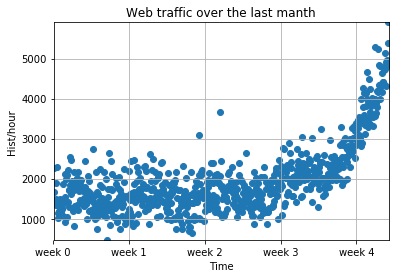

In [18]:
# まず、データの全容を掴むために Matplotlib を使用して散布図を作成する
# Matplotlib の pyplot というパッケージで散布図を描画できる
import matplotlib.pyplot as plt

# 散布図を生成
plt.scatter(x, y)

# 軸にタイトルを追加
plt.title("Web traffic over the last manth")
plt.xlabel("Time")
plt.ylabel("Hist/hour")

# x 軸の time を　一週間ごとに
plt.xticks([w*7*24 for w in range(10)], ['week %i' %w for w in range(10)])

# グラフをオートスケール
plt.autoscale(tight=True)

# 散布図にグリッドを追加
plt.grid()

plt.show()

# はじめの週では概ね一定だが、最後の週で急に増加していることがわかる

In [19]:
# はじめてのモデル構築

#  「モデル」 => 複雑な現実世界で怒る現象を理論的に単純化して近似したもの
# 近似することで誤差（エラーが生じる）
# この誤差を手がかりに無数にあるモデルの中から正しいモデルを選択できる

# 誤差は実際のデータとモデルが予測した値のユーグリッド平方距離として計算して求めることが可能
def error(f, x, y):
    return sp.sum((f(x) - y) ** 2)

In [20]:
# 単純な直線で近似する

# 扱う対象が直線で表現できる単純なモデルであると仮定する
# どのように直線を配置したら、上のグラフ上で近似誤差を最小にできるか

# Scipy の polyfit() で求めることが可能
# x, y と多項式の次元（直線の場合は 1） を指定すると誤差を最小とするモデル関数を得られる

fp1, residuals, rank , sv, rcond = sp.polyfit(x, y, 1, full=True)

In [21]:
# 近似したモデル関数についてのパラメータ fp1 を返す
# 引数に full=True を指定することで、近似プロセスについてさらに情報を得られる
# residuals は近似誤差を表す（他は今回不要、通常 full=True の情報も不要）

print("Model parameters: %s" %fp1)
print(residuals)

Model parameters: [    2.57152281  1002.10684085]
[  3.19874315e+08]


In [22]:
# 上は以下の式が最適な近似関数であることを表す
# f(x) = 2.57152281 * x + 1002.10684085

In [23]:
# また、polyld() をもちいることでモデルパラメータからモデル関数を作ることができる
# 同様の結果が以下のようにして得られる

f1 = sp.poly1d(fp1)
print(error(f1, x, y))

319874314.777


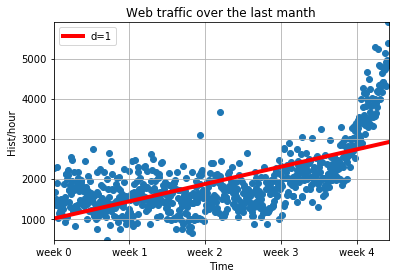

In [24]:
# 学習したモデルを先程の散布図に描画

# 散布図を生成
plt.scatter(x, y)

# 軸にタイトルを追加
plt.title("Web traffic over the last manth")
plt.xlabel("Time")
plt.ylabel("Hist/hour")

# x 軸の time を　一週間ごとに
plt.xticks([w*7*24 for w in range(10)], ['week %i' %w for w in range(10)])

# グラフをオートスケール
plt.autoscale(tight=True)

# 散布図にグリッドを追加
plt.grid()

# プロットように x値　を生成
fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth=4, color='red')
plt.legend(["d=%i" % f1.order], loc="upper left")

plt.show()


In [25]:
# はじめは大きくハズレていないが、四週目から大きく外れている
# 直線では表すことができない

# 誤差の結果について
# 319874314.777 という値をそれだけで評価することはできない
# しかし、競合するモデルと比較する時の判断材料になる
# このモデルは明らかに間違い
# しかし、今後新しいモデルを作成したときの比較基準となる

In [26]:
# より進んだやり方
# 次数が 2 の多項式曲線に当てはめる

f2p = sp.polyfit(x, y, 2)
print(f2p)
f2 = sp.poly1d(f2p)
print(error(f2, x, y))

[  1.04688184e-02  -5.21727812e+00   1.96921629e+03]
182006476.432


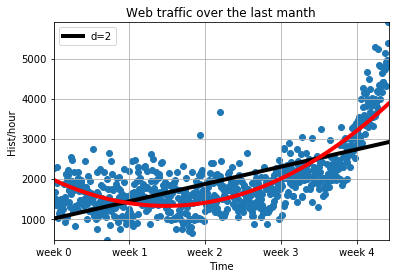

In [27]:
# 学習したモデルを先程の散布図に描画

# 散布図を生成
plt.scatter(x, y)

# 軸にタイトルを追加
plt.title("Web traffic over the last manth")
plt.xlabel("Time")
plt.ylabel("Hist/hour")

# x 軸の time を　一週間ごとに
plt.xticks([w*7*24 for w in range(10)], ['week %i' %w for w in range(10)])

# グラフをオートスケール
plt.autoscale(tight=True)

# 散布図にグリッドを追加
plt.grid()

# f1p 
fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth=4, color='black')
plt.legend(["d=%i" % f1.order], loc="upper left")

# f2p 
fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f2(fx), linewidth=4, color='red')
plt.legend(["d=%i" % f2.order], loc="upper left")

plt.show()


In [28]:
# 次数 1
# f(x) = 2.57152281 * x + 1002.10684085
# error = 319874314.777

# 次数 2
# f(x) = 1.04688184e-02 * x**2 + -5.21727812e+00 * x + 1.96921629e+03
# error = 182006476.432

# 考察
# error が先程の半分近くになった
# 代償に、関数が複雑になった
# 具体的には、１つ多くのパラメータを求める必要がある

[ -3.34620309e-22   1.20928033e-18  -1.87848610e-15   1.64543022e-12
  -8.95575981e-10   3.14120913e-07  -7.09430776e-05   9.92485731e-03
  -7.79923670e-01   2.74410627e+01   1.32360787e+03]
123592114.553


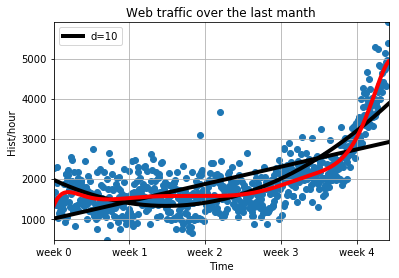

In [29]:
# さらに次数を増やすと

f10p = sp.polyfit(x, y, 10)
print(f10p)
f10 = sp.poly1d(f10p)
print(error(f10, x, y))

# 散布図を生成
plt.scatter(x, y)

# 軸にタイトルを追加
plt.title("Web traffic over the last manth")
plt.xlabel("Time")
plt.ylabel("Hist/hour")

# x 軸の time を　一週間ごとに
plt.xticks([w*7*24 for w in range(10)], ['week %i' %w for w in range(10)])

# グラフをオートスケール
plt.autoscale(tight=True)

# 散布図にグリッドを追加
plt.grid()

# f1p 
fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth=4, color='black')
plt.legend(["d=%i" % f1.order], loc="upper left")

# f2p 
fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f2(fx), linewidth=4, color='black')
plt.legend(["d=%i" % f2.order], loc="upper left")

# f10p 
fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f10(fx), linewidth=4, color='red')
plt.legend(["d=%i" % f10.order], loc="upper left")

plt.show()


In [30]:
# 次数が 10 の場合、短い周期で振動する曲線になっている
# これは、もでるがデータに適応しすぎている
# プロセスの本質を捉えているだけでなく、データに含まれるノイズまでも捉えている
# この様な振る舞いを　過学習　という

# 対策
# ➀多項式モデルからどれか１つを選択する
# ➁より複雑なモデル（スプライン曲線）などに切り替える
# ➂データについて別の視点で考え、はじめからやり直す

# ➀は、次数2 ,3 の時に適している？　 =>  右端部分の曲線がデータと異なる
# ➁は、間違っている   =>  なぜ？　　わかりづらくするだけだから？

In [31]:
# データを違う視点から眺める

# データを見ると、3.5 周目辺りから急に変化している
# そこを境にデータを分割して、２つの直線で近似する

# 変化点（急に変化する点）の時間を計算
inflection = 3.5 * 7 * 24

# 変化点前のデータポイント
xa = x[:int(inflection)]
ya = y[:int(inflection)]

# 変化点後のデータポイント
xb = x[int(inflection):]
yb = y[int(inflection):]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)

print("Error inflection = %f" % (fa_error + fb_error))

Error inflection = 136467834.765625


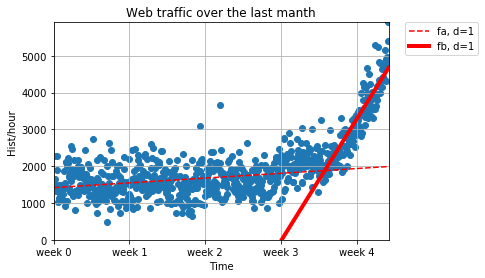

In [32]:
# 散布図を生成
plt.scatter(x, y)

# 軸にタイトルを追加
plt.title("Web traffic over the last manth")
plt.xlabel("Time")
plt.ylabel("Hist/hour")

# x 軸の time を　一週間ごとに
plt.xticks([w*7*24 for w in range(10)], ['week %i' %w for w in range(10)])

# グラフをオートスケール
plt.autoscale(tight=True)

# 散布図にグリッドを追加
plt.grid()

# y軸の範囲を指定（最小値 0）
plt.ylim(ymin = 0)

# fa
fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, fa(fx), color='red', linestyle='--', label=("fa, d=%i" % fa.order))
# plt.legend(["d=%i" % fa.order], loc=2)

# fb
fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, fb(fx), color='red', linewidth=4, label=("fb, d=%i" % fb.order))
# plt.legend(["d=%i" % fb.order], loc=2)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

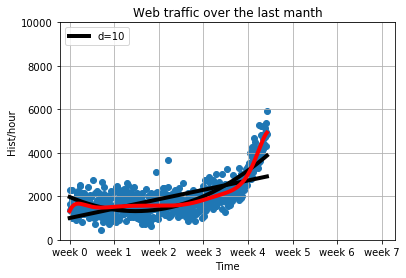

In [33]:
# データを分割しない状態で、先を予測してみる
# 失敗したから教科書で

# 散布図を生成
plt.scatter(x, y)

# 軸にタイトルを追加
plt.title("Web traffic over the last manth")
plt.xlabel("Time")
plt.ylabel("Hist/hour")

# x 軸の time を　一週間ごとに
plt.xticks([w*7*24 for w in range(10)], ['week %i' %w for w in range(10)])

# グラフをオートスケール
# plt.autoscale(tight=True)

# 散布図にグリッドを追加
plt.grid()

# y軸の範囲を指定（最小値 0）
plt.ylim(ymin = 0, ymax = 10000)
# x軸の範囲を指定（最大値 0）
plt.xlim(xmax = 3.5 * 7 * 50)

# f1p 
fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth=4, color='black')
plt.legend(["d=%i" % f1.order], loc="upper left")

# f2p 
fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f2(fx), linewidth=4, color='black')
plt.legend(["d=%i" % f2.order], loc="upper left")

# f10p 
fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f10(fx), linewidth=4, color='red')
plt.legend(["d=%i" % f10.order], loc="upper left")

plt.show()


In [34]:
# 訓練データとテストデータ

# テストデータに用いるデータの割合
frac = 0.3
# テストデータに用いるデータ個数を決定
split_idx = int(frac * len(xb))
# 全データの　３０％　をランダムに選び出す
shuffled = sp.random.permutation(list(range(len(xb))))
# テスト用のデータインデックス配列
test = sorted(shuffled[:split_idx])
# 訓練用のデータインデックス配列
train = sorted(shuffled[split_idx:])

# それぞれの訓練データを用いて訓練を行う
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

# それぞれのテストデータを用いて評価を行なう
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

Error d=1: 9058486.882330
Error d=2: 6694200.752264
Error d=3: 7869692.264828
Error d=10: 8209556.695259
Error d=53: 8232745.016956


/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:18: RankWarning: Polyfit may be poorly conditioned
/opt/conda/lib/python3.5/site-packages/numpy/lib/polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned


In [35]:
# 上の結果から、エラーが最も小さい次数が 3 のモデルが最も信頼できることがわかった

# いつサーバが限界に達するか

# 扱うモデルが 3 次元のため、三次方程式の解を求めればよい
# Scipy では optimize モジュールの fsolve　関数を用いて求めることが可能

print(fbt2)
print(fbt2 - 100000)

         2
0.08628 x - 95.62 x + 2.84e+04
         2
0.08628 x - 95.62 x - 7.16e+04


In [40]:
from scipy.optimize import fsolve
reached_max = fsolve(fbt2 - 100000, -100) / (7 * 24)
print("100,000 hist/hour expected at weed %f" % reached_max[0])

100,000 hist/hour expected at weed -3.048528
